# Principal Component Analysis

PCA falls under the topic of dimensionality reduction in which we try to reduce the number of dimensions (number of features) in our dataset by projecting our dataset into a lower dimensional space. This is helpful for several reasons. 

1. Removing features helps alieve overfitting to a certain degree.
2. Less dimensions allow for faster computational speed and shorter training times.
3. Removing dimensions requires less storage space for the data.

Some features of high dimensional data may not offer much more useful information because usually there are underlying correlations between features. For example with cars we can say that usually more powerful cars (with more cylinders) usually have a smaller mpg (miles per gallon). So both these features together don't bring much newer information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(linewidth=500, precision=3)

In [2]:
df = pd.read_csv('../data/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
data = df.values
data.shape, data

((32, 11),
 array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,   0.   ,   1.   ,   4.   ,   4.   ],
        [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,   0.   ,   1.   ,   4.   ,   4.   ],
        [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,   1.   ,   1.   ,   4.   ,   1.   ],
        [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,   1.   ,   0.   ,   3.   ,   1.   ],
        [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,   0.   ,   0.   ,   3.   ,   2.   ],
        [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,   1.   ,   0.   ,   3.   ,   1.   ],
        [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,   0.   ,   0.   ,   3.   ,   4.   ],
        [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,   1.   ,   0.   ,   4.   ,   2.   ],
        [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,   1.   ,   0.   ,   4.   ,   2.   ],
        

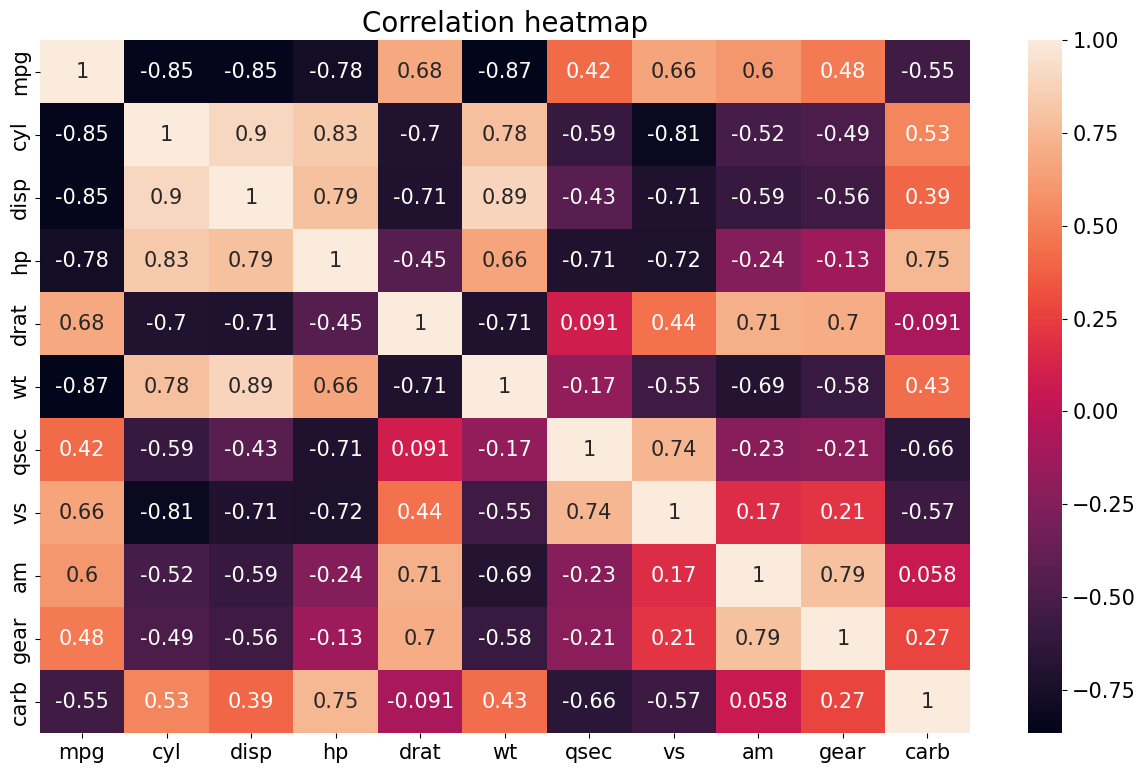

In [4]:
corr = df.corr()

mpl.rcParams['font.size'] = 15

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap', fontsize=20);

PCA uses eigenvectors and eigenvalues to transform our data into a lower dimensional space. 

First, calculate the correlation matrix of your data (steps on how to do so can be found [here](https://github.com/eytanohana/Data-Science-and-Statistics/blob/master/covariance%20and%20correlation%20matrix.ipynb)) We use the correlation matrix in order to find and remove correlated columns. 
 
Next, we find the eigenvalues and corresponding eigenvectors of the matrix. Higher eigenvalues correspond to eigenvectors that help explain the data more.

We then sort the eigenvectors by their corresponding eigenvalue from highest to lowest and choose the first k eigenvectors. These k vectors are what we will use to project our data into a lower dimensional space via matrix multiplication.

In [5]:
eig_vals, eig_vecs = np.linalg.eig(corr)

print(len(eig_vals), ',', eig_vecs.shape, '\n')

print(eig_vals, '\n')
# each eigenvector is a column in the matrix
print(eig_vecs)

11 , (11, 11) 

[6.608 2.65  0.627 0.022 0.052 0.077 0.123 0.135 0.27  0.223 0.212] 

[[ 0.363 -0.016  0.226  0.125  0.139  0.236  0.754 -0.368 -0.023  0.103  0.109]
 [-0.374 -0.044  0.175  0.141 -0.846  0.054  0.231 -0.057 -0.003  0.058 -0.169]
 [-0.368  0.049  0.061 -0.661  0.049  0.198 -0.001 -0.214  0.257  0.394  0.336]
 [-0.33  -0.249 -0.14   0.256  0.248 -0.576  0.222  0.001 -0.068  0.54  -0.071]
 [ 0.294 -0.275 -0.161  0.04  -0.101 -0.047 -0.032 -0.021  0.855  0.077 -0.244]
 [-0.346  0.143 -0.342  0.567  0.094  0.359  0.009  0.021  0.246 -0.075  0.465]
 [ 0.2    0.463 -0.403 -0.181 -0.271 -0.528  0.232 -0.05   0.068 -0.165  0.33 ]
 [ 0.307  0.232 -0.429 -0.008 -0.159  0.359 -0.026  0.266 -0.215  0.6   -0.194]
 [ 0.235 -0.429  0.206 -0.03  -0.178 -0.047  0.06   0.587 -0.03   0.09   0.571]
 [ 0.207 -0.462 -0.29   0.054 -0.214 -0.002 -0.336 -0.605 -0.265  0.048  0.244]
 [-0.214 -0.414 -0.529 -0.32   0.072  0.171  0.396  0.175 -0.127 -0.361 -0.184]]


In [6]:
# sort th eigenvalues indices from highest eigenval to lowest
sorted_indices = eig_vals.argsort()[::-1]

eig_vecs = eig_vecs[:,sorted_indices]
eig_vals = eig_vals[sorted_indices]

print(eig_vals, '\n')
print(eig_vecs)

[6.608 2.65  0.627 0.27  0.223 0.212 0.135 0.123 0.077 0.052 0.022] 

[[ 0.363 -0.016  0.226 -0.023  0.103  0.109 -0.368  0.754  0.236  0.139  0.125]
 [-0.374 -0.044  0.175 -0.003  0.058 -0.169 -0.057  0.231  0.054 -0.846  0.141]
 [-0.368  0.049  0.061  0.257  0.394  0.336 -0.214 -0.001  0.198  0.049 -0.661]
 [-0.33  -0.249 -0.14  -0.068  0.54  -0.071  0.001  0.222 -0.576  0.248  0.256]
 [ 0.294 -0.275 -0.161  0.855  0.077 -0.244 -0.021 -0.032 -0.047 -0.101  0.04 ]
 [-0.346  0.143 -0.342  0.246 -0.075  0.465  0.021  0.009  0.359  0.094  0.567]
 [ 0.2    0.463 -0.403  0.068 -0.165  0.33  -0.05   0.232 -0.528 -0.271 -0.181]
 [ 0.307  0.232 -0.429 -0.215  0.6   -0.194  0.266 -0.026  0.359 -0.159 -0.008]
 [ 0.235 -0.429  0.206 -0.03   0.09   0.571  0.587  0.06  -0.047 -0.178 -0.03 ]
 [ 0.207 -0.462 -0.29  -0.265  0.048  0.244 -0.605 -0.336 -0.002 -0.214  0.054]
 [-0.214 -0.414 -0.529 -0.127 -0.361 -0.184  0.175  0.396  0.171  0.072 -0.32 ]]


In [7]:
cumulative = (eig_vals / eig_vals.sum()).cumsum()
cumulative *= 100
cumulative

array([ 60.076,  84.172,  89.873,  92.324,  94.356,  96.279,  97.509,  98.626,  99.327,  99.8  , 100.   ])

In [8]:
explainability = eig_vals / eig_vals.sum() * 100
explainability

array([60.076, 24.095,  5.702,  2.451,  2.031,  1.924,  1.23 ,  1.117,  0.7  ,  0.473,  0.2  ])

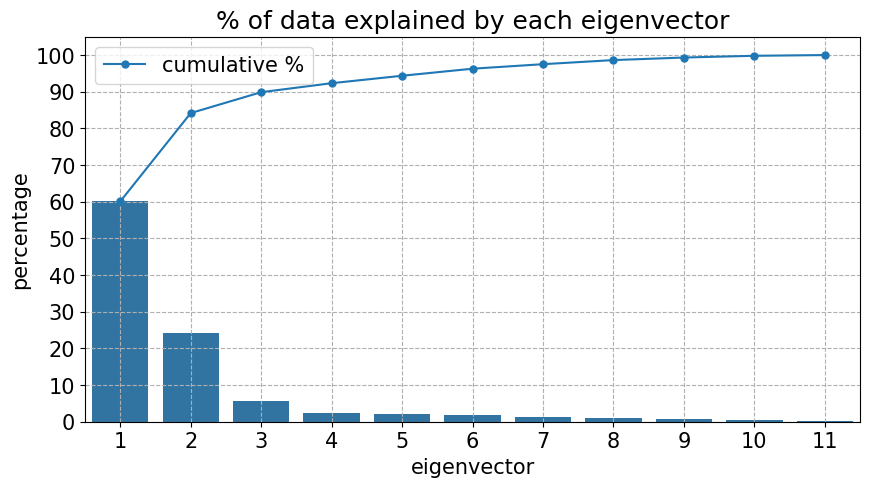

In [9]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(eig_vals)), cumulative, '-o', markersize=5, label='cumulative %')
sns.barplot(x=np.arange(1,len(eig_vals)+1), y=explainability)
plt.title('% of data explained by each eigenvector')
plt.xlabel('eigenvector')
plt.ylabel('percentage')
plt.yticks(np.linspace(0, 1, 11) * 100)
plt.grid(ls='dashed')
plt.legend();

From the graph above we can see that around 95% of the data can be explained using only the first 5 eigenvectors, so we can project our space dataset into a 5 dimensional space and still retain around 95% of the original information. 

We started with 11 dimensions and were able to reduce this to 5, thats around a 55% reduction. 

In [10]:
W = eig_vecs[:,:5].copy()
W

array([[ 0.363, -0.016,  0.226, -0.023,  0.103],
       [-0.374, -0.044,  0.175, -0.003,  0.058],
       [-0.368,  0.049,  0.061,  0.257,  0.394],
       [-0.33 , -0.249, -0.14 , -0.068,  0.54 ],
       [ 0.294, -0.275, -0.161,  0.855,  0.077],
       [-0.346,  0.143, -0.342,  0.246, -0.075],
       [ 0.2  ,  0.463, -0.403,  0.068, -0.165],
       [ 0.307,  0.232, -0.429, -0.215,  0.6  ],
       [ 0.235, -0.429,  0.206, -0.03 ,  0.09 ],
       [ 0.207, -0.462, -0.29 , -0.265,  0.048],
       [-0.214, -0.414, -0.529, -0.127, -0.361]])

In [11]:
data.shape, W.shape

((32, 11), (11, 5))

Once we have decided how many columns of our eigenvectors to keep based on how much information we want to retain, we just project our data into this lower dimensional space by matrix multiplying our original dataset against the truncated eigenvector matrix.

In [12]:
transformed_data = data.dot(W)
transformed_data.shape

(32, 5)

In [13]:
df_transformed = pd.DataFrame(transformed_data, index=df.index)
df_transformed.head()

,0,1,2,3,4
model,,,,,
Mazda RX4,-86.099800,-17.077950,-10.999562,36.626234,121.187532
Mazda RX4 Wag,-86.075801,-16.781986,-11.312500,36.727061,121.076186
Datsun 710,-58.474147,-12.915574,-11.360159,24.593102,92.935229
Hornet 4 Drive,-121.380008,-8.195295,-4.915638,61.873682,160.786839
Hornet Sportabout,-183.178178,-21.132777,-7.216355,83.742890,235.342895


We now have our new dataset which we can train using almost any ML algorithm